<a href="https://colab.research.google.com/github/shintafiaa/TeachingAssisting-ML/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prompt: beri kode untuk menghubungkan google colab dengan google drive

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Prompt: Beri kode untuk membaca dataset dan mengubah dataset sebagai dataframe

In [14]:
import pandas as pd

# Path ke file dataset di Google Drive setelah mounting
file_path = "/content/drive/MyDrive/Dataset/Mall_Customers.csv"

# Membaca file dataset ke dalam dataframe
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataframe
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Prompt:

Dataframe yang saya miliki bernama df, dan memiliki nama-nama atribut/kolom sebagai berikut:

CustomerID

Gender

Age

Annual Income (k$)

Spending Score (1-100)

Beri kode untuk mengubah nama atribut:

Annual Income (k$)

Spending Score (1-100)

menjadi:

Annual Income

Spending Score

In [16]:
# Mengubah nama atribut dalam dataframe
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# Menampilkan informasi dataframe setelah perubahan
print(df.head())

   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


Prompt:

Dari atribut ini mana yang perlu dihapus karena tidak relevan dengan proses clustering:

CustomerID

Gender

Age

Annual Income (k$)

Spending Score (1-100)

Dalam proses clustering, atribut "Customer ID" dan "Gender" tidak relevan karena clustering berfokus pada pola atau hubungan antar data. Atribut "Gender" yang hanya memiliki nilai diskrit seperti 'male' atau 'female' tidak membantu dalam menemukan pola atau kelompok yang ada. Namun, atribut "Age", "Annual Income", dan "Spending Score" semuanya dapat relevan dalam proses clustering karena mereka mengandung informasi kontinu atau numerik yang dapat digunakan untuk menemukan kelompok atau pola yang berbeda dalam data.

Proses clustering, yang merupakan teknik analisis data unsupervised, bertujuan untuk mengelompokkan objek atau contoh ke dalam kelompok-kelompok atau klaster berdasarkan kesamaan fitur atau karakteristik tertentu. Ketika Anda melakukan proses clustering, Anda mencoba untuk menemukan pola atau kesamaan dalam data berdasarkan fitur numerik atau karakteristik tertentu.

Dalam kasus ini, atribut "Gender" memiliki nilai diskrit, seperti "male" dan "female". Atribut ini tidak dapat memberikan informasi yang signifikan dalam proses clustering karena proses clustering bekerja dengan mencari pola berdasarkan nilai numerik atau kontinu. "Gender" tidak memiliki representasi numerik yang bermakna, sehingga tidak memberikan kontribusi yang signifikan dalam menemukan pola atau kelompok dalam dataset Anda.

Namun, jika Anda ingin melakukan analisis yang berkaitan dengan perbedaan atau karakteristik khusus antara kelompok berdasarkan gender, Anda dapat melakukan analisis yang terpisah setelah proses clustering selesai atau dengan menggunakan teknik analisis data yang lebih tepat seperti uji hipotesis atau analisis perbedaan antar kelompok.

Prompt:

Beri kode untuk menghapus kolom:

CustomerID

Gender

pada dataframe saya yang bernama df

In [17]:
# Menghapus kolom "Customer ID" dan "Gender" dari dataframe
df = df.drop(['CustomerID', 'Gender'], axis=1)

# Menampilkan informasi dataframe setelah penghapusan kolom
print(df.head())

   Age  Annual Income  Spending Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


Prompt:

Bagaimana menentukan jumlah cluster?

Metode yang umum digunakan untuk menentukan jumlah klaster yang optimal adalah metode "elbow method".

Elbow Method: Metode ini melibatkan memplot inersia terhadap jumlah klaster dan mencari "siku" pada grafik. Siku adalah titik di mana penurunan inersia mulai melambat secara signifikan. Jumlah klaster di sekitar titik siku dianggap sebagai jumlah klaster yang optimal.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

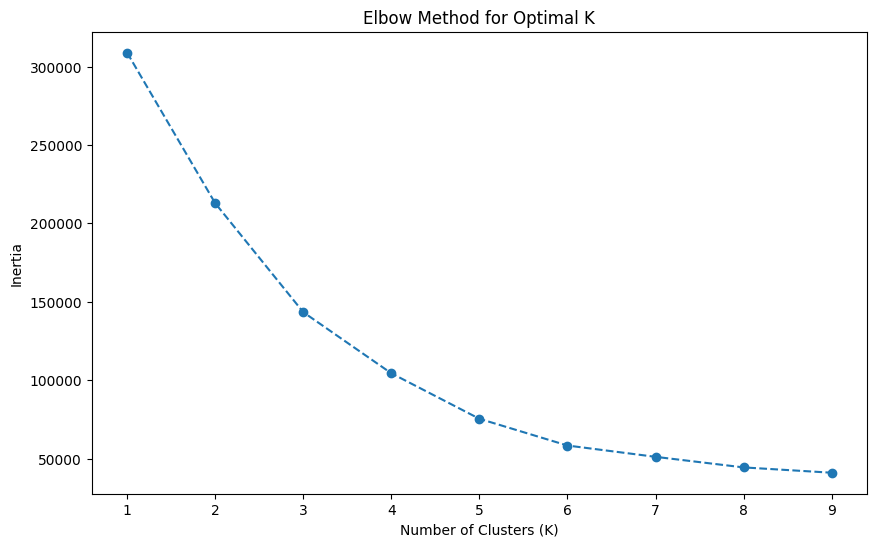

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengambil nilai yang akan digunakan untuk clustering
X = df[['Age', 'Annual Income', 'Spending Score']]

# Menentukan jumlah cluster yang diinginkan
max_k = 10  # Jumlah maksimum cluster yang akan diuji
inertia_values = []

# Menghitung inersia untuk setiap nilai K
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Membuat plot elbow
plt.figure(figsize=(10,6))
plt.plot(range(1, max_k), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


Prompt:

dengan dataframe bernama df, beri kode untuk membuat model k means clustering yang berisi atribut 'Age', 'Annual Income', 'Spending Score'; jumlah cluster=5; dan beri kolom baru bernama label dan visualisasikan berdasarkan label.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


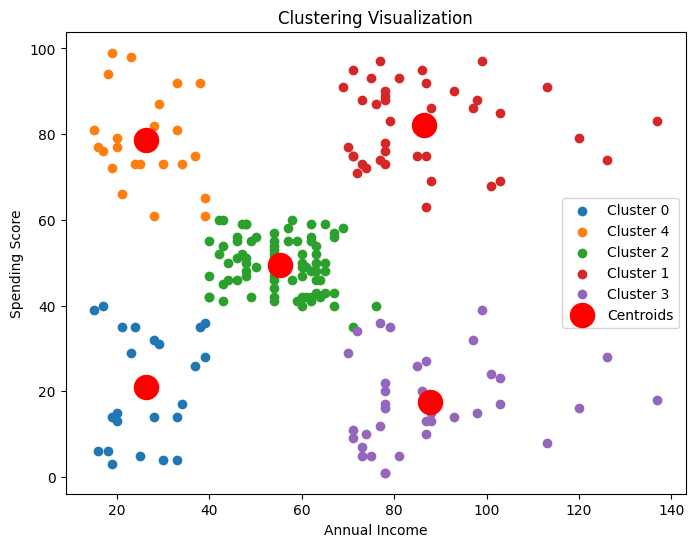

In [19]:
# Tetapkan jumlah cluster yang diinginkan
n_clusters = 5

# Buat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Lakukan clustering pada data
df['label'] = kmeans.fit_predict(X)

# Visualisasikan data berdasarkan label
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['Annual Income'],
                df[df['label'] == label]['Spending Score'],
                label=f'Cluster {label}')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
            s=300, c='red', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

Prompt:

Bagaimana cara menghitung akurasi dari clustering?

Sehubungan dengan clustering, tidak ada pengukuran akurasi bawaan seperti yang biasa digunakan dalam masalah klasifikasi dan regresi. Hal ini karena clustering adalah tugas unsupervised learning, yang berarti kita tidak memiliki label yang sudah diketahui untuk mengevaluasi performa model. Namun, ada beberapa metrik yang dapat digunakan untuk mengevaluasi kualitas clustering, meskipun tidak sama dengan akurasi pada masalah supervised learning.

Berikut adalah beberapa metrik evaluasi yang umum digunakan dalam clustering:

1. **Inertia**: Seperti yang sudah dibahas sebelumnya, inertia mengukur seberapa padat klaster tersebut. Semakin rendah inertia, semakin baik model clustering.

2. **Silhouette Score**: Silhouette score mengukur seberapa baik setiap sampel ditempatkan dalam klasternya sendiri dibandingkan dengan klaster lain. Nilai silhouette score berkisar dari -1 hingga 1. Nilai yang lebih tinggi menunjukkan clustering yang lebih baik.

3. **Davies-Bouldin Index (DBI)**: DBI mengukur seberapa baik klaster telah dipisahkan satu sama lain. Nilai DBI yang lebih rendah menunjukkan clustering yang lebih baik.

4. **Calinski-Harabasz Index**: Indeks ini mengevaluasi kualitas clustering berdasarkan seberapa padat dan terpisah klaster tersebut. Nilai yang lebih tinggi menunjukkan clustering yang lebih baik.

Ketika mengevaluasi clustering, penting untuk mempertimbangkan konteks dari data dan tujuan analisis. Selain itu, interpretasi visual dari hasil clustering juga dapat membantu dalam mengevaluasi apakah klaster yang dihasilkan bermakna secara bisnis atau penelitian.

In [20]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluasi inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

# Menghitung silhouette score
silhouette_avg = silhouette_score(X, df['label'])
print(f'Silhouette Score: {silhouette_avg}')

# Menghitung Davies-Bouldin index
dbi = davies_bouldin_score(X, df['label'])
print(f'Davies-Bouldin Index: {dbi}')

# Menghitung Calinski-Harabasz index
ch_score = calinski_harabasz_score(X, df['label'])
print(f'Calinski-Harabasz Index: {ch_score}')

Inertia: 75350.77917248776
Silhouette Score: 0.44428597560893024
Davies-Bouldin Index: 0.8218781633199781
Calinski-Harabasz Index: 151.04386000160667


Prompt:

kenapa bisa menghasilkan nilai ini:

Inertia: 75350.77917248776
Silhouette Score: 0.44428597560893024
Davies-Bouldin Index: 0.8218781633199781
Calinski-Harabasz Index: 151.04386000160667

Nilai-nilai evaluasi yang Anda sebutkan di atas, yaitu inertia, silhouette score, Davies-Bouldin index, dan Calinski-Harabasz index, memberikan gambaran tentang kualitas clustering yang telah Anda lakukan pada model K-Means.

1. **Inertia**: Nilai inertia yang diberikan adalah 75350.77917248776. Nilai ini mencerminkan jumlah total jarak kuadrat antara setiap titik data dan pusat klaster terdekatnya. Semakin rendah nilai inertia, semakin baik kualitas clustering yang dihasilkan.

2. **Silhouette Score**: Silhouette score adalah metrik yang mengukur seberapa baik setiap sampel ditempatkan dalam klaster mereka masing-masing dibandingkan dengan klaster lain. Nilai silhouette score yang diberikan adalah 0.44428597560893024. Nilai ini menunjukkan seberapa baik klaster terpisah satu sama lain. Nilai silhouette score yang mendekati 1 menunjukkan bahwa klaster tersebut terpisah dengan baik.

3. **Davies-Bouldin Index**: Davies-Bouldin index adalah metrik yang mengukur seberapa baik klaster telah dipisahkan satu sama lain. Nilai Davies-Bouldin index yang diberikan adalah 0.8218781633199781. Semakin rendah nilai ini, semakin baik kualitas clustering yang dihasilkan.

4. **Calinski-Harabasz Index**: Calinski-Harabasz index adalah metrik yang mengevaluasi kualitas clustering berdasarkan seberapa padat dan terpisah klaster tersebut. Nilai Calinski-Harabasz index yang diberikan adalah 151.04386000160667. Nilai yang lebih tinggi menunjukkan clustering yang lebih baik.

Dengan memeriksa nilai-nilai ini, Anda dapat memahami kualitas clustering yang telah dicapai oleh model K-Means Anda. Semua nilai ini memberikan gambaran yang komprehensif tentang seberapa baik data Anda telah dikelompokkan oleh model tersebut.

In [21]:
from sklearn.metrics import silhouette_score

# Inisialisasi dictionary untuk menyimpan nilai silhouette score
silhouette_scores = {}

# Menghitung silhouette score untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan nilai silhouette score untuk setiap nilai k
for k, silhouette_avg in silhouette_scores.items():
    print(f"Silhouette Score for k={k}: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.293166070535953
Silhouette Score for k=3: 0.3839349967742105
Silhouette Score for k=4: 0.40546302077733304
Silhouette Score for k=5: 0.44428597560893024
Silhouette Score for k=6: 0.4523443947724053
Silhouette Score for k=7: 0.4412807576186172
Silhouette Score for k=8: 0.4280971079746162
Silhouette Score for k=9: 0.40126260157691634
Silhouette Score for k=10: 0.3790978814868016


In [22]:
from sklearn.metrics import davies_bouldin_score

# Inisialisasi dictionary untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = {}

# Menghitung Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    dbi_scores[k] = dbi

# Menampilkan nilai Davies-Bouldin Index untuk setiap nilai k
for k, dbi in dbi_scores.items():
    print(f"Davies-Bouldin Index for k={k}: {dbi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 1.3571023143309133
Davies-Bouldin Index for k=3: 0.8748062648492879
Davies-Bouldin Index for k=4: 0.8914904209843165
Davies-Bouldin Index for k=5: 0.8218781633199781
Davies-Bouldin Index for k=6: 0.746974007275528
Davies-Bouldin Index for k=7: 0.7863764854525301
Davies-Bouldin Index for k=8: 0.8641438876447516
Davies-Bouldin Index for k=9: 0.9070119449899816
Davies-Bouldin Index for k=10: 0.9573604236246045


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
from sklearn.metrics import calinski_harabasz_score

# Inisialisasi dictionary untuk menyimpan nilai Calinski-Harabasz Index
chi_scores = {}

# Menghitung Calinski-Harabasz Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    chi = calinski_harabasz_score(X, labels)
    chi_scores[k] = chi

# Menampilkan nilai Calinski-Harabasz Index untuk setiap nilai k
for k, chi in chi_scores.items():
    print(f"Calinski-Harabasz Index for k={k}: {chi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 89.28096999467428
Calinski-Harabasz Index for k=3: 113.70507138642179
Calinski-Harabasz Index for k=4: 127.9838294818919
Calinski-Harabasz Index for k=5: 151.04386000160667
Calinski-Harabasz Index for k=6: 166.7204931788687
Calinski-Harabasz Index for k=7: 162.2852042279988
Calinski-Harabasz Index for k=8: 163.58062876554533
Calinski-Harabasz Index for k=9: 156.15508760692356
Calinski-Harabasz Index for k=10: 152.26426170758603


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


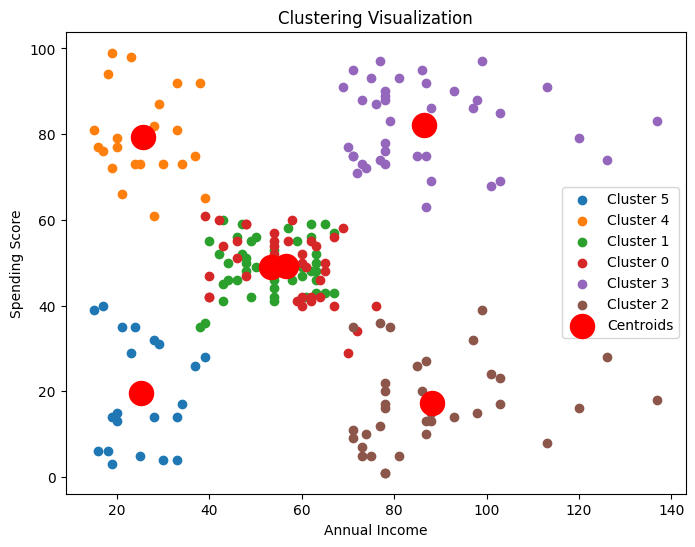

In [24]:
# Tentukan jumlah cluster
n_clusters = 6

# Buat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Lakukan clustering pada data dan tambahkan label ke dataframe
df['label'] = kmeans.fit_predict(X)

# Visualisasikan data berdasarkan label
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['Annual Income'],
                df[df['label'] == label]['Spending Score'],
                label=f'Cluster {label}')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
            s=300, c='red', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clustering Visualization')
plt.legend()
plt.show()
